# Chapter 4 - Introduction to neural learning: gradient descent
----
## Predict, compare, and learn
In chapter 3, you learned about the first step: predict. In this chapter, we will learn the next two steps: compare and learn.

## Compare: Does your network make good predictions?

### Lets measure the error and find out!

In [2]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8

pred = input * knob_weight

error = (pred - goal_pred) ** 2 # Forces the error to be positive

print(error)

0.30250000000000005


### Why do we square errors?

1. We want a positive error set so when we take an average of the errors, we don't accidently cancel errors out by adding positive and negative errors.
2. Squaring helps us focus on big errors (errors > 1 grow bigger) while ignoring small errors (errors < 1 grow smaller)

## What's the simplest form of neural learning?
---
### Learning using the hot and cold method

We want to adjust **knob_weight** up or down so the error is reduced. Once the error goes to zero we are done learning! How do you know if you should turn it up or down? Try both and see which reduces the error, then update **knob_weight** to the value that reduces error. After repeating this process enough times, error will go to zero and we have perfect accuracy.

**Hot and cold learning** means wiggling the weights to see which direction reduces the error the most, moving the weights in that direction, and repeating until the error gets to 0.

In [4]:
weight = 0.1
lr = 0.01

def neural_network(input, weight):
    pred = input * weight
    return pred

number_of_toes = [8.5]
win_or_lose_binary = [1] # We won!

input = number_of_toes[0]
real_result = win_or_lose_binary[0]

pred = neural_network(input, weight)

error = (pred - real_result) ** 2
print(error)

p_down = neural_network(input, weight-lr)
e_down = (p_down - real_result) ** 2
print(f"down error: {e_down}")

p_up = neural_network(input, weight+lr)
e_up = (p_up - real_result) ** 2
print(f"up error: {e_up}")

if(error > e_down or error > e_up):
    old_weight = weight
    if(e_down < e_up):
        weight -= lr
    if(e_up < e_down):
        weight += lr
print(f"modified weight: {old_weight} -> {weight}")

0.022499999999999975
down error: 0.05522499999999994
up error: 0.004224999999999993
modified weight: 0.1 -> 0.11


## Hot and Cold Learning - Example

In [13]:
weight = 0.5
input = 0.5
goal_prediction = 0.8
step_amount = 0.001

# Repeat the learning for many iterations to reduce error
for iteration in range(1101):
    
    pred = input * weight
    error = (pred - goal_prediction) ** 2
    if iteration % 100 == 0: # dont spam!
        print(f"[{iteration}] Error: {error} | Prediction: {pred}")

    # Test moving up
    p_up = input * (weight + step_amount)
    e_up = (p_up - goal_prediction) ** 2

    # Test moving down
    p_down = input * (weight - step_amount)
    e_down = (p_down - goal_prediction) ** 2

    if(e_down < e_up): # down is better!
        weight -= step_amount

    if(e_down > e_up): # up is better!
        weight += step_amount

[0] Error: 0.30250000000000005 | Prediction: 0.25
[100] Error: 0.25 | Prediction: 0.30000000000000004
[200] Error: 0.20249999999999996 | Prediction: 0.3500000000000001
[300] Error: 0.15999999999999992 | Prediction: 0.40000000000000013
[400] Error: 0.1224999999999999 | Prediction: 0.4500000000000002
[500] Error: 0.0899999999999999 | Prediction: 0.5000000000000002
[600] Error: 0.06250000000000266 | Prediction: 0.5499999999999947
[700] Error: 0.04000000000000434 | Prediction: 0.5999999999999892
[800] Error: 0.0225000000000049 | Prediction: 0.6499999999999837
[900] Error: 0.01000000000000437 | Prediction: 0.6999999999999782
[1000] Error: 0.0025000000000027357 | Prediction: 0.7499999999999727
[1100] Error: 1.0799505792475652e-27 | Prediction: 0.7999999999999672


## Characteristics of Hot and Cold Learning
----
### Benefits
1. It's simple - Just make 2 predictions, 1 up and 1 down and choose the one with less error. Repeat until error is within an acceptable range.

### Problems
1. It's inefficient - We need to make multiple predictions to make a single **knob_weight** update.
2. Sometimes it's impossible to predict the exact target prediction - Since we are moving towards a direction in a fixed step size it's possible we will never exactly hit the target prediction and just end up circling around it. The real issue is that we know the **direction** to move but not the **amount** to move. We need to relate the **step_amount** to the size of the *error* somehow, so the bigger the error the more we move.

## Calculating both direction and amount from error
---
## Measure the error and find the direction *and* amount

In [2]:
weight = 0.5
p_target = 0.8
input = 0.5

for i in range(20):
    p_guess = input * weight
    error = (p_guess - p_target) ** 2
    direction_and_amount = (p_guess - p_target) * input
    weight = weight - direction_and_amount

    print(f"Error: {error} | Pred: {p_guess}")

Error: 0.30250000000000005 | Pred: 0.25
Error: 0.17015625000000004 | Pred: 0.3875
Error: 0.095712890625 | Pred: 0.49062500000000003
Error: 0.05383850097656251 | Pred: 0.56796875
Error: 0.03028415679931642 | Pred: 0.6259765625
Error: 0.0170348381996155 | Pred: 0.669482421875
Error: 0.00958209648728372 | Pred: 0.70211181640625
Error: 0.005389929274097089 | Pred: 0.7265838623046875
Error: 0.0030318352166796153 | Pred: 0.7449378967285156
Error: 0.0017054073093822882 | Pred: 0.7587034225463867
Error: 0.0009592916115275371 | Pred: 0.76902756690979
Error: 0.0005396015314842384 | Pred: 0.7767706751823426
Error: 0.000303525861459885 | Pred: 0.7825780063867569
Error: 0.00017073329707118678 | Pred: 0.7869335047900676
Error: 9.603747960254256e-05 | Pred: 0.7902001285925507
Error: 5.402108227642978e-05 | Pred: 0.7926500964444131
Error: 3.038685878049206e-05 | Pred: 0.7944875723333098
Error: 1.7092608064027242e-05 | Pred: 0.7958656792499823
Error: 9.614592036015323e-06 | Pred: 0.7968992594374867
Err

### Analysis
------
**direction_and_amount** represents how we should change the weight to reduce the error. The first part, **(p_guess - p_target)** is *pure_error*. The second part, **"\* input"**, performs *scaling*, *negative reversal*, and *stopping*. This form of learning is known as **gradient descent**.

1. **pure_error** indicates the raw direction and amount we missed the target. If this number is *positive*, we predicted too *high*, and vice versa. If this number is *big*, then we missed by a *big* amount.
2. **scaling, negative reveral, and stopping** are the properties that multiplying the **pure_error** by the input provides. They address three major edge cases where going by the pure error isn't sufficient to make a good modification to the **weight**.
3. **stopping** makes it so that if the **input** is 0, then no change is made to the **weight**.
4. **negative reversal** makes it so that if the **input** is *negative* then the *direction* we need to change the **weight** is opposite to when it is **positive**. Multiplying by the **input** will have the effect of reversing the *direction* resulting in the correct movement.
5. **scaling** allows us to adjust the **amount** moved relative to both the **pure error** and **input**. This can often go out of control, which we will use *alpha* to address.

## Gradient Descent - Example
----

In [17]:
weight, p_target, input = (0.0, 0.8, 0.5)

weight_hist = [weight]
for i in range(4):
    p_guess = input * weight
    delta = p_guess - p_target          # this is our pure_error
    error = delta ** 2
    weight_delta = delta * input        # the direction_and_amount
    weight = weight - weight_delta      # why '-' ? If we guessed too high, the weight_delta will be positive 
    weight_hist.append(weight)          # and we need to lower the weight. Too low and the weight delta will be
                                        # negative, thus making it an addition operation and increasing the weight
    print(f"Error: {error} | Pred: {p_guess}")

Error: 0.6400000000000001 | Pred: 0.0
Error: 0.3600000000000001 | Pred: 0.2
Error: 0.2025 | Pred: 0.35000000000000003
Error: 0.11390625000000001 | Pred: 0.4625


## Learning is just reducing error
-----
What values does error rely on?

$
error = (pred - goal\_pred)^2
$

By replace pred with it's formula we can see that:

$
error = ((input * weight) - goal\_pred)^2
$

Now, since **input** and **goal_pred** are _static_ we can replace them for:

$
error = ((0.5 * weight) - 0.8)^2
$

So, for any **input** and **goal_pred**, an *exact relationship* is defined betweeen _error_ and _weight_

If we increased _weight_ by 0.5, since there's an exact relationship between error and weight, we can calculate how much _error_ moves.

$
for weight = 0
error = (( 0.5 * 0) - 0.8)^2
error = (0 - 0.8)^2
error = (-0.8)^2
error = 0.64
$

Now, increase _weight_ by 0.5:

$
for weight = 0.5
error = ((0.5 * 0.5) - 0.8)^2
error = (0.25 - 0.8)^2
error = (-0.55)^2
error = 0.3025
$

So we can see that increasing _weight_ redouced the _error_ by $0.64-0.3025=0.3375$ units.

What if we wanted to move the _error_ in a specific direction? Could it be done?

0.7,0.20250000000000007
y-intercept: 0.5175000000000001
slope: -0.45000000000000007


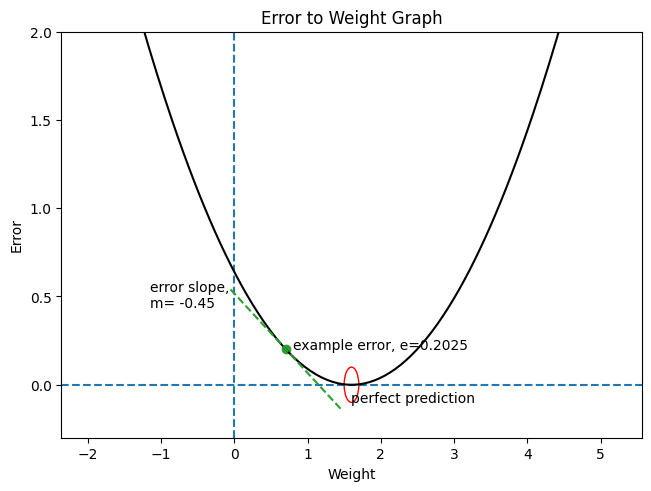

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# generate xbounds based on our fomurla
x_min = -2
err_zero = 0.8 / 0.5 
x_max = lambda min: err_zero*2+abs(x_min)
xbounds = (x_min, x_max(x_min))


# generate error-weight graph data
x_vals = np.linspace(x_min, x_max(x_min), 200) # plot points
f_y = lambda x: ((0.5 * x) - 0.8)**2


# calculate point and line for slope
x1 = 0.7
y1 = f_y(x1)

# Calculate slope derivative of (0.5x - 0.8)^2
# factorized: 0.25*(x**2) - (0.8 * x) + 0.64
# dy/dx: 0.5*x - 0.8
dy_dx = lambda x: 0.5*x - 0.8

y_intercept = y1 - (dy_dx(x1)*x1)
print(f"{x1},{y1}")
print(f"y-intercept: {y_intercept}")
print(f"slope: {dy_dx(x1)}")

# Slope-intercept form
# y = mx + b, where m is the slope and b is the y-intercept
def si(x1, x_line):
    return dy_dx(x1)*x_line + y_intercept

x1_line = np.linspace(x1-0.75, x1+0.75, 100)

# create our figure and axes
fig, ax = plt.subplots(layout="constrained")
ax.set_xlabel("Weight")
ax.set_xbound(xbounds)
ax.set_ylabel("Error")
ax.set_ybound((-0.3,6))
ax.set_ylim(-0.3, 2)
ax.set_title("Error to Weight Graph")

# Show the x=y=0 lines
ax.axvline(ls="--")
ax.axhline(ls="--")

# Draw the error-weight graph
ax.plot(x_vals, f_y(x_vals), color="k")

# Draw error=0
e_circle = plt.Circle((err_zero, 0), 0.1, color="r", fill=False)
ax.add_patch(e_circle)
ax.annotate("perfect prediction", (err_zero, -0.1))

# Draw example error point and slope/tanget line
ax.scatter(x1, f_y(x1), color="C2")
ax.plot(x1_line, si(x1, x1_line), "C2--")
ax.annotate(f"example error, e={y1:.4f}", (x1+0.1, f_y(x1)))
ax.annotate(f"error slope, \nm= {dy_dx(x1):.2f}", (x1_line[0]-1.1, si(x1, x1_line[0])-0.1))

plt.show()

## Let's watch several steps of learning
----
Now, lets watch as the neural network learns and gets better at predicting!

P1: 0.00 | E: 0.64
P2: 0.97 | E: 0.03
P3: 0.76 | E: 0.00
P4: 0.81 | E: 0.00


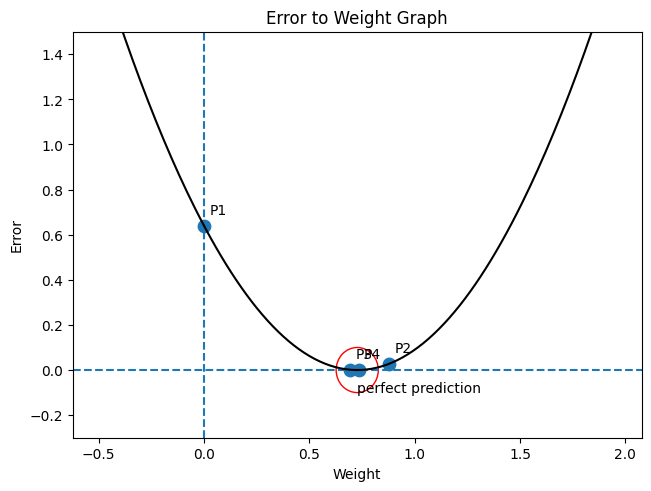

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

weight, p_target, input_data = (0.0, 0.8, 1.1)

pred_hist = []
for i in range(4):
    p_guess = input_data * weight
    delta = p_guess - p_target
    error = delta ** 2
    hist = {"i": i, "weight": weight, "p_guess": p_guess, "err": error}
    weight_delta = delta * input_data
    weight = weight - weight_delta
    pred_hist.append(hist)
    
    

# generate xbounds based on our formula: error = ((1.1 * weight) - 0.8) ** 2
x_min = -0.5
err_zero = 0.8 / 1.1 
x_max = lambda min: err_zero*2+abs(x_min)
xbounds = (x_min, x_max(x_min))

# generate error-weight graph data
x_vals = np.linspace(x_min, x_max(x_min), 200) # plot points
f_y = lambda x: ((1.1 * x) - 0.8)**2

# create our figure and axes
fig, ax = plt.subplots(layout="constrained")
ax.set_xlabel("Weight")
ax.set_xbound(xbounds)
ax.set_ylabel("Error")
ax.set_ybound((-0.3,6))
ax.set_ylim(-0.3, 1.5)
ax.set_title("Error to Weight Graph")

# Draw our guesses
for hist in pred_hist:
    step = hist.get('i')
    err = hist.get('err')
    weight = hist.get('weight')
    guess = hist.get('p_guess')
    ax.scatter(weight, f_y(weight), s=80, color="C0" )
    ax.annotate(f"P{step+1}", (weight+0.025, f_y(weight)+0.05))
    print(f"P{step+1}: {guess:.2f} | E: {err:.2f}")


# Show the x=y=0 lines
ax.axvline(ls="--")
ax.axhline(ls="--")

# Draw the error-weight graph
ax.plot(x_vals, f_y(x_vals), color="k")

# Draw error=0
e_circle = plt.Circle((err_zero, 0), 0.1, color="r", fill=False)
ax.add_patch(e_circle)
ax.annotate("perfect prediction", (err_zero, -0.1))

plt.show()

## Why does this work? What is weight_delta, really?
-----
Consider a function:
```python

def my_function(x):
    return x * 2
```

What controls the relationship between the input and the output in this function? The _**\* 2**_ part.

Now, consider this function:
```python
error = ((input * weight) - goal_pred) ** 2
```

What controls the relationship between the _**input**_ and the _**output**_ (_**error**_)? Several things: _**input**_, _**weight**_, _**goal_pred**_, the exponentiation _**\*\* 2**_, the _**- and \***_ operators, and the order of operations from _**()s**_.

Changing any of them can change the error. However, what is changable without _**invalidating**_ the output?

Consider what each represent:
* _**input**_: This is the data we get from the real world. Changing this means we will deviate from the reality we want to predict, making the prediction pointless. This is loosely how [_**inceptionism**_](https://blog.research.google/2015/06/inceptionism-going-deeper-into-neural.html#:~:text=The%20original%20image%20influences%20what,the%20neural%20net%20architecture%20used.) works.
* _**goal_pred**_: This is the goal we are aiming for. Moving the goal post to make our prediction more accurate (lower error) makes the whole process pointless (unless the goal was wrong in the first place).
* _**\*\* 2, (), -, \***_: The order of operations, exponentiation, and algebraic operators are all part of how we calculate a good error. If we don't have a good error, we have
* _**weight**_: this is the only variable we can change without destroying the integrity of the prediction system by breaking our perception of the world, changing our goal, or destroying the way we measure error.

To summarize: 
- Learning is all about changing the prediction function so that it makes good predictions (ie, error goes down to 0).
- Some parts of the error function can be changed (weights) and some need to be immutable (input, goal, and error logic)
- You can modify anything in the prediction function except input

## Tunnel vision on one concept
-----
### Concept: Learning is adjusting the weight to reduce the error to 0

- _**Sensitivty**_ is another name for diction and amount.
- We want to know how _**sensitive**_ _error_ is to _weight_.
- Using derivatives we can know how any two variables in a formula interact.
- You don't need to understand all of calculus for deep learning, just a small subset.
- Note that _**sensitivity**_ can be _positive_, _negative_, or _zero_, as in y = 0 * x, or error = 0 * weight.

## How to use a derivative to learn
-----
### weight_delta is your derivative

See this graph below

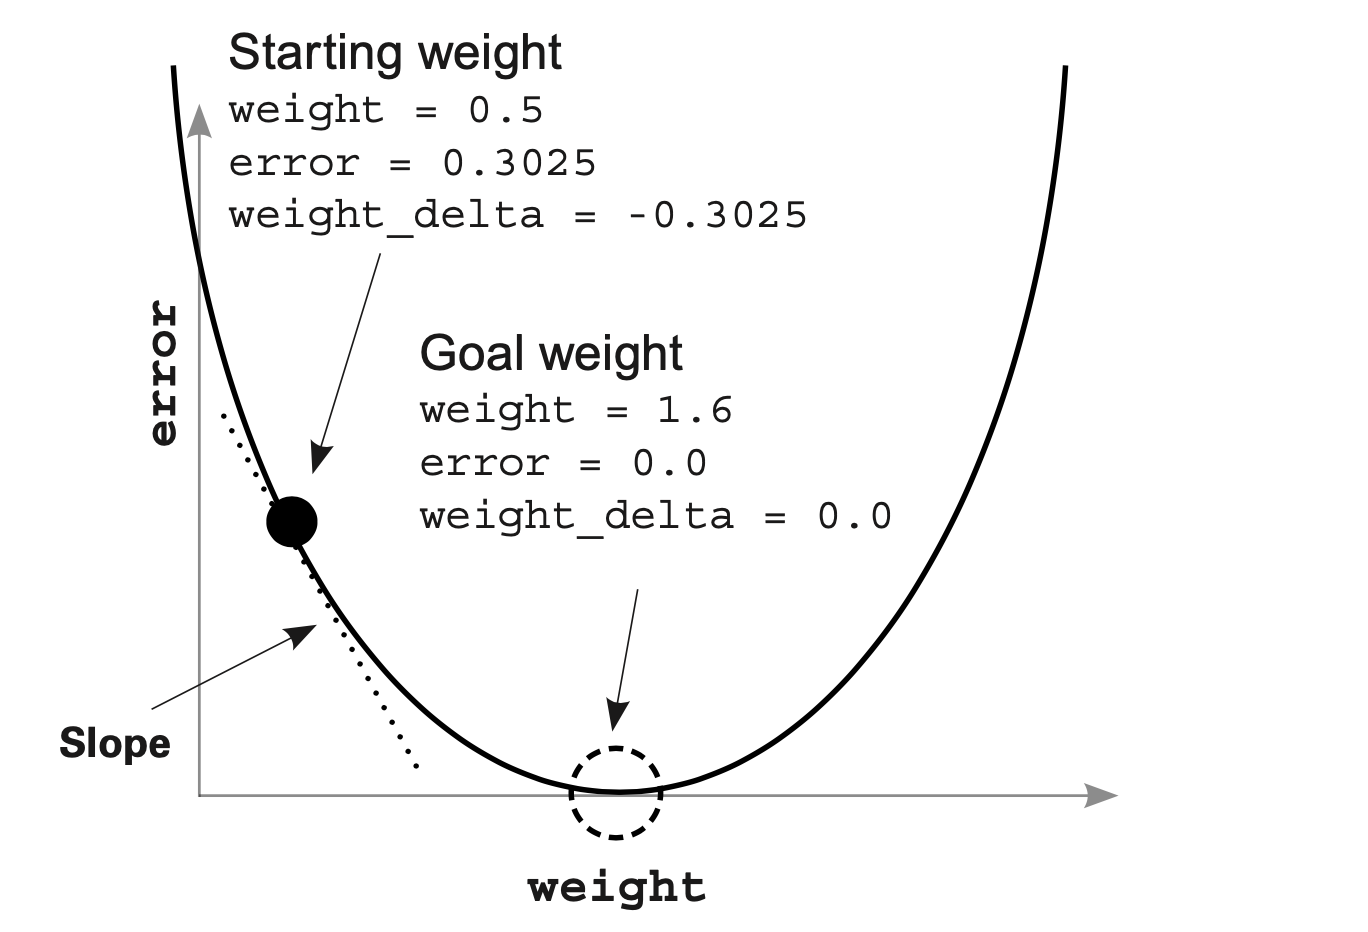

To use the derivative to find the _error_ minimum:
1. Take each *weight* value
2. Calculate it's derivavate with respect to *error*
3. Change *weight* in the opposite direction of the slope (derivative)

This method for learning is called *gradient descent*.

## Breaking gradient descent
-----

In [19]:

def learn(steps:int, start_weight: float, goal_pred:float, inp: float, verbose:bool = True) -> float:
    """Returns the final weight"""
    w, gp, inp = (start_weight, goal_pred, inp)

    for iteration in range(steps):
        pred = inp * w
        e = (pred - gp) ** 2
        d = pred - gp
        wd = inp * d
        w = w - wd
        if verbose:
            print(f"E:{e:.3f} W:{w:.3f} P:{pred:.3f} Da: {abs(d):.3f} WDa: {abs(wd):.3f}")

    return w
    

w, gp, inp = (0.5, 0.8, 0.5)
learn(20, w, gp, inp)

E:0.303 W:0.775 P:0.250 Da: 0.550 WDa: 0.275
E:0.170 W:0.981 P:0.388 Da: 0.413 WDa: 0.206
E:0.096 W:1.136 P:0.491 Da: 0.309 WDa: 0.155
E:0.054 W:1.252 P:0.568 Da: 0.232 WDa: 0.116
E:0.030 W:1.339 P:0.626 Da: 0.174 WDa: 0.087
E:0.017 W:1.404 P:0.669 Da: 0.131 WDa: 0.065
E:0.010 W:1.453 P:0.702 Da: 0.098 WDa: 0.049
E:0.005 W:1.490 P:0.727 Da: 0.073 WDa: 0.037
E:0.003 W:1.517 P:0.745 Da: 0.055 WDa: 0.028
E:0.002 W:1.538 P:0.759 Da: 0.041 WDa: 0.021
E:0.001 W:1.554 P:0.769 Da: 0.031 WDa: 0.015
E:0.001 W:1.565 P:0.777 Da: 0.023 WDa: 0.012
E:0.000 W:1.574 P:0.783 Da: 0.017 WDa: 0.009
E:0.000 W:1.580 P:0.787 Da: 0.013 WDa: 0.007
E:0.000 W:1.585 P:0.790 Da: 0.010 WDa: 0.005
E:0.000 W:1.589 P:0.793 Da: 0.007 WDa: 0.004
E:0.000 W:1.592 P:0.794 Da: 0.006 WDa: 0.003
E:0.000 W:1.594 P:0.796 Da: 0.004 WDa: 0.002
E:0.000 W:1.595 P:0.797 Da: 0.003 WDa: 0.002
E:0.000 W:1.597 P:0.798 Da: 0.002 WDa: 0.001


1.5965116668671726

The above works normally, but what happens if we set _input_ to 2?

In [5]:
w, gp, inp = (0.5, 0.8, 2.0)
learn(20, w, gp, inp)

E:0.040 W:0.100 P:1.000 Da: 0.200 WDa: 0.400
E:0.360 W:1.300 P:0.200 Da: 0.600 WDa: 1.200
E:3.240 W:-2.300 P:2.600 Da: 1.800 WDa: 3.600
E:29.160 W:8.500 P:-4.600 Da: 5.400 WDa: 10.800
E:262.440 W:-23.900 P:17.000 Da: 16.200 WDa: 32.400
E:2361.960 W:73.300 P:-47.800 Da: 48.600 WDa: 97.200
E:21257.640 W:-218.300 P:146.600 Da: 145.800 WDa: 291.600
E:191318.760 W:656.500 P:-436.600 Da: 437.400 WDa: 874.800
E:1721868.840 W:-1967.900 P:1313.000 Da: 1312.200 WDa: 2624.400
E:15496819.560 W:5905.300 P:-3935.800 Da: 3936.600 WDa: 7873.200
E:139471376.040 W:-17714.300 P:11810.600 Da: 11809.800 WDa: 23619.600
E:1255242384.360 W:53144.500 P:-35428.600 Da: 35429.400 WDa: 70858.800
E:11297181459.240 W:-159431.900 P:106289.000 Da: 106288.200 WDa: 212576.400
E:101674633133.160 W:478297.300 P:-318863.800 Da: 318864.600 WDa: 637729.200
E:915071698198.439 W:-1434890.300 P:956594.600 Da: 956593.800 WDa: 1913187.600
E:8235645283785.954 W:4304672.500 P:-2869780.600 Da: 2869781.400 WDa: 5739562.800
E:74120807

348678440.4999999

The weight (and thus, prediction) explodes in value. Why?

## Divergence
-----
### Sometimes neural networks explode in value. Oops?

Lets look at how we are updating the weight:

weight<sub>n+1</sub> = weight<sub>n</sub> - (input * (pred - goal_pred))

We can see that if the *input* causes the _delta_ (ie: the _pred_ - _goal\_pred_ part) to grow, then we will have what is called a _divergence_.

Consider the following:

$
i = input
$

$
w_{n} = current weight
$

$
w_{n+1} = next weight
$

$
pg = prediction goal
$

$
d = delta
$

$
w_{n+1} = w_n - i (w_n*i - pg)
$

$
d_{n} = w_{n}*i - pg
$

$
d_{n+1} = w_{n+1}*i - pg
$

We want the absolute value of delta to be decreasing, not increasing, or stopped (unless we are at the goal)

$
|d_{n+1}| < |d_{n}|
$

Lets evaluate this equation a bit:

$
|d_{n+1}| < |d_{n}| => d_{n+1} < \pm d_{n}
$

We can split this into evaluating two equations now:

$
d_{n+1} < d_n \quad \textrm{and} \quad d_{n+1} < -d_{n}
$

| **__$d_{n+1} < d_n $__** | **__$d_{n+1} < -d_{n}$__** |
|:---------------:|:------------------:|
| **Substitute $d_{n+1}$ and $d_n$** | **Substitute $d_{n+1}$ and $d_n$** |
|$w_{n+1}*i - pg < w_n*i - pg$|$w_{n+1}*i - pg < -(w_n*i - pg)$|
| **Substitute $w_{n+1}$** | **Substitute $w_{n+1}$** |
|$i(w_n-i(w_n*i-pg)) - pg < w_n*i - pg$|$i(w_n-i(w_n*i-pg)) - pg < -(w_n*i - pg)$|
| **Expand $i(w_n-i(w_n*i-pg))$** | **Expand $i(w_n-i(w_n*i-pg))$** |
|$w_n*i-i^2(w_n*i-pg) - pg < w_n*i - pg$| $w_n*i-i^2(w_n*i-pg) - pg < -(w_n*i - pg)$ |
| **Expand $-i^2(w_n*i-pg)$** | **Expand $-i^2(w_n*i-pg)$** |
|$-w_n*i^3+pg*i^2+w_n*i-pg < w_n*i - pg$| $-w_n*i^3+pg*i^2+w_n*i-pg < -(w_n*i - pg)$ |
| **Subtract $w_n*i-pg$ from both sides** | **Add $w_n*i-pg$ to both sides** |
|$-w_n*i^3+pg*i^2 < 0$| $-w_n*i^3+pg*i^2+2*w_n*i-2pg < 0$ |

### Try to calculate where the divergence starts on input

In [13]:
start_inp = 0.5
w, gp, inp = (0.5, 0.8, start_inp)
for i in range(1000):
    end_weight = learn(20000, w, gp, inp, False)
    if end_weight > 100000 or end_weight < -100000:
        print(f"Divergence at input {inp}")
        break
    inp += 0.01

w, gp, inp = (0.5, 0.8, start_inp)
for i in range(1000):
    end_weight = learn(20000, w, gp, inp, False)
    if end_weight > 100000 or end_weight < -100000:
        print(f"Divergence at input {inp}")
        break
    inp -= 0.01

Divergence at input 1.4200000000000008
Divergence at input -1.4200000000000013


### Calculate the divergence points from the above formula
-----

In [3]:
import sympy as sp

# Define the variable and the inequality
x = sp.symbols('x')
inequality1 = -0.5 * x**3 + 0.8 * x**2 < 0
inequality2 = -0.5 * x**3 + 0.8 * x**2 + x - 1.6 < 0

# Solve the inequality
solution1 = sp.solve_univariate_inequality(inequality1, x, relational=False)
solution2 = sp.solve_univariate_inequality(inequality2, x, relational=False)
print(solution1)
print(solution2)

Interval.open(1.60000000000000, oo)
Union(Interval.open(-1.41421356237310, 1.41421356237310), Interval.open(1.60000000000000, oo))


### Graph the divergence points
----

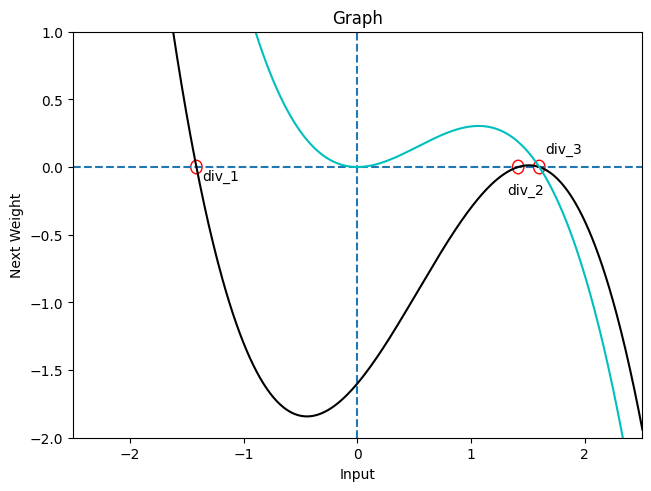

In [18]:
def draw_equal_zero():
    x_vals = np.linspace(-10, 10, 2000) # plot points
    f_y_neg = lambda x: -0.5*(x**3)+0.8*(x**2)+x-1.6
    f_y_pos = lambda x: -0.5*(x**3)+0.8*(x**2)
    
    # create our figure and axes
    fig, ax = plt.subplots(layout="constrained")
    ax.set_xlabel("Input")
    ax.set_xbound(xbounds)
    ax.set_xlim(-2.5,2.5)
    ax.set_ylabel("Next Weight")
    ax.set_ylim(-2.0, 1)
    ax.set_title("Graph")
    
    # Show the x=y=0 lines
    ax.axvline(ls="--")
    ax.axhline(ls="--")
    
    # Draw the error-weight graph
    ax.plot(x_vals, f_y_neg(x_vals), color="k")
    ax.plot(x_vals, f_y_pos(x_vals), color="c")

    # Set our 3 divergence points from the calculation
    div_1 = -1.41421356237310
    div_2 = 1.41421356237310
    div_3 = 1.6

    # Draw divergence points
    div_1_circle = plt.Circle((div_1, 0), 0.05, color="r", fill=False)
    ax.add_patch(div_1_circle)
    ax.annotate("div_1", (div_1+0.05, -0.1))

    div_2_circle = plt.Circle((div_2, 0), 0.05, color="r", fill=False)
    ax.add_patch(div_2_circle)
    ax.annotate("div_2", (div_2-0.1, -0.2))

    div_3_circle = plt.Circle((div_3, 0), 0.05, color="r", fill=False)
    ax.add_patch(div_3_circle)
    ax.annotate("div_3", (div_3+0.05, 0.1))

    plt.show()

draw_equal_zero()

### Introducing Alpha - The solution to Deviation
----

- The simplest way to prevent overcorrection is to scale back the amount you correct by multiplying it be an alpha value
- Alpha is just a constant we set. It's value is generally found via trial and error.
- Alpha will not solve divergence, just make it so it happens on larger inputs.
- If the alpha is too large, we will still see divergence on larger inputs in the range we expect.
- If the alpha is too small, we will see that training will slow down drastically. (this can add up to lots of $$$)
- [RK[ Question: can we catch divergence in motion and apply an alpha as needed to prevent divergence?

In [61]:
def learn_with_alpha(steps:int, start_weight: float, goal_pred:float, inp: float, alpha:float, verbose:bool = True) -> float:
    """Returns the final weight"""
    w, gp, inp = (start_weight, goal_pred, inp)

    for iteration in range(steps):
        pred = inp * w
        e = (pred - gp) ** 2
        d = pred - gp
        wd = inp * d
        w = w - (wd * alpha)
        if verbose:
            print(f"E:{e:.3f} W:{w:.3f} P:{pred:.3f} Da: {abs(d):.3f} WDa: {abs(wd):.3f}")

    return w
    

w, gp, inp, alpha = (0.5, 0.8, 2, 0.49)
learn_with_alpha(200, w, gp, inp, alpha)

E:0.040 W:0.304 P:1.000 Da: 0.200 WDa: 0.400
E:0.037 W:0.492 P:0.608 Da: 0.192 WDa: 0.384
E:0.034 W:0.312 P:0.984 Da: 0.184 WDa: 0.369
E:0.031 W:0.485 P:0.623 Da: 0.177 WDa: 0.354
E:0.029 W:0.318 P:0.970 Da: 0.170 WDa: 0.340
E:0.027 W:0.478 P:0.637 Da: 0.163 WDa: 0.326
E:0.025 W:0.325 P:0.957 Da: 0.157 WDa: 0.313
E:0.023 W:0.472 P:0.650 Da: 0.150 WDa: 0.301
E:0.021 W:0.331 P:0.944 Da: 0.144 WDa: 0.289
E:0.019 W:0.466 P:0.661 Da: 0.139 WDa: 0.277
E:0.018 W:0.336 P:0.933 Da: 0.133 WDa: 0.266
E:0.016 W:0.461 P:0.672 Da: 0.128 WDa: 0.255
E:0.015 W:0.341 P:0.923 Da: 0.123 WDa: 0.245
E:0.014 W:0.456 P:0.682 Da: 0.118 WDa: 0.235
E:0.013 W:0.346 P:0.913 Da: 0.113 WDa: 0.226
E:0.012 W:0.452 P:0.692 Da: 0.108 WDa: 0.217
E:0.011 W:0.350 P:0.904 Da: 0.104 WDa: 0.208
E:0.010 W:0.448 P:0.700 Da: 0.100 WDa: 0.200
E:0.009 W:0.354 P:0.896 Da: 0.096 WDa: 0.192
E:0.008 W:0.444 P:0.708 Da: 0.092 WDa: 0.184
E:0.008 W:0.358 P:0.888 Da: 0.088 WDa: 0.177
E:0.007 W:0.441 P:0.715 Da: 0.085 WDa: 0.170
E:0.007 W:

0.40002846076752696

In [58]:
# Test learning with a dynamic alpha value so we dont need to guess and do trial and error
def learn_with_dynamic_alpha(steps:int, weight:float, goal:float, inp: float, err_tolerance:float = 0.001, verbose:bool = False) -> (float, float):
    last_err: float | None = None
    saved_weight: float = 0.0
    alpha: float = 1.0
    alpha_dec:float = 0.001

    # Perform an activation step. Return the error and new weight
    def activate(weight:float, goal:float, inp:float, alpha:float) -> (float,float,float,float,float,float):
        pred = weight * inp
        delta = pred - goal
        err = delta ** 2
        weighted_delta = delta * inp
        new_weight = weight - (weighted_delta * alpha)
        return (err, new_weight, pred, delta, weighted_delta, alpha)

    if verbose:
        print(f"Start: W:{weight:.3f} G:{goal:.3f} I:{inp:.3f} Steps:{steps}")

    # Naive and ugly implementation. Better implementation would cache each step's 
    # state and rewind and update the alpha if we see the error is deviating.
    for step in range(steps):
        step = step + 1
        if last_err is None:
            last_err, saved_weight, pred, delta, weighted_delta, used_alpha = activate(weight, goal, inp, alpha)
            if verbose:
                print(f"S:{step} E:{last_err:.3f} W:{saved_weight:.3f} P:{pred:.3f} |D|: {abs(delta):.3f} |WD|: {abs(weighted_delta):.3f} A:{used_alpha}")
        elif err_tolerance > last_err:
            # Good enough, we found our weights
            break
        else:
            # Try the activation function again, if we don't see any improvement in the error then we should reduce the alpha
            next_err2, new_weight, pred, delta, weighted_delta, used_alpha = activate(saved_weight, goal, inp, alpha)

            if verbose:
                print(f"S:{step} E:{next_err2:.3f} OW:{saved_weight:.3f} NW:{new_weight:.3f} P:{pred:.3f} |D|: {abs(delta):.3f} |WD|: {abs(weighted_delta):.3f} A:{used_alpha}")

            # We need to scale the alpha value if error is increasing on each step
            while next_err2 > last_err:
                next_err1 = None
                # Update alpha and try again
                alpha = alpha - alpha_dec
                if alpha < 0:
                    # We broke something, exit and report
                    if verbose:
                        print(f"S:{step} E:{next_err2:.3f} OW:{saved_weight:.3f} NW:{new_weight:.3f} P:{pred:.3f} |D|: {abs(delta):.3f} |WD|: {abs(weighted_delta):.3f} A:{alpha}")
                    return 0, 0

                # We need to test 2 steps to see if the alpha change has an effect
                next_err1, new_weight1, pred1, delta1, weighted_delta1, used_alpha1 = activate(saved_weight, goal, inp, alpha)
                if verbose:
                    print(f"S:{step}a E:{next_err1:.3f} NW:{new_weight1:.3f} P:{pred1:.3f} |D|: {abs(delta1):.3f} |WD|: {abs(weighted_delta1):.3f} A:{used_alpha1}")
                next_err2, new_weight2, pred2, delta2, weighted_delta2, used_alpha2 = activate(new_weight1, goal, inp, alpha)
                if verbose:
                    print(f"S:{step}b E:{next_err2:.3f} NW:{new_weight2:.3f} P:{pred2:.3f} |D|: {abs(delta2):.3f} |WD|: {abs(weighted_delta2):.3f} A:{used_alpha2}")
            
            saved_weight = new_weight1
            last_err = next_err1 or next_err2

    return last_err, saved_weight

w, gp, inp = (0.5, 0.8, 2)
learn_with_dynamic_alpha(200, w, gp, inp, verbose=True)

Start: W:0.500 G:0.800 I:2.000 Steps:200
S:1 E:0.040 W:0.100 P:1.000 |D|: 0.200 |WD|: 0.400 A:1.0
S:2 E:0.360 OW:0.100 NW:1.300 P:0.200 |D|: 0.600 |WD|: 1.200 A:1.0
S:2a E:0.360 NW:1.299 P:0.200 |D|: 0.600 |WD|: 1.200 A:0.999
S:2b E:3.231 NW:-2.293 P:2.598 |D|: 1.798 |WD|: 3.595 A:0.999
S:2a E:0.360 NW:1.298 P:0.200 |D|: 0.600 |WD|: 1.200 A:0.998
S:2b E:3.223 NW:-2.286 P:2.595 |D|: 1.795 |WD|: 3.590 A:0.998
S:2a E:0.360 NW:1.296 P:0.200 |D|: 0.600 |WD|: 1.200 A:0.997
S:2b E:3.214 NW:-2.278 P:2.593 |D|: 1.793 |WD|: 3.586 A:0.997
S:2a E:0.360 NW:1.295 P:0.200 |D|: 0.600 |WD|: 1.200 A:0.996
S:2b E:3.206 NW:-2.271 P:2.590 |D|: 1.790 |WD|: 3.581 A:0.996
S:2a E:0.360 NW:1.294 P:0.200 |D|: 0.600 |WD|: 1.200 A:0.995
S:2b E:3.197 NW:-2.264 P:2.588 |D|: 1.788 |WD|: 3.576 A:0.995
S:2a E:0.360 NW:1.293 P:0.200 |D|: 0.600 |WD|: 1.200 A:0.994
S:2b E:3.188 NW:-2.257 P:2.586 |D|: 1.786 |WD|: 3.571 A:0.994
S:2a E:0.360 NW:1.292 P:0.200 |D|: 0.600 |WD|: 1.200 A:0.993
S:2b E:3.180 NW:-2.250 P:2.583 |D|: 

(0.3599999999999998, 0.49959999999999927)